<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Final-Project/ECGR_5105_Classical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import pickle
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import tarfile

# Download and extract CIFAR-100 dataset
def download_cifar100():
    url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    response = requests.get(url, stream=True)

    with open("cifar-100-python.tar.gz", "wb") as f:
        for chunk in response.iter_content(chunk_size=128):
            f.write(chunk)

def extract_cifar100():
    with tarfile.open("cifar-100-python.tar.gz", "r:gz") as tar:
        tar.extractall()

def load_cifar100():
    filename = os.path.join("cifar-100-python", "train")
    with open(filename, "rb") as f:
        data = pickle.load(f, encoding="bytes")

    x_train = data[b"data"]
    y_train = data[b"fine_labels"]

    filename = os.path.join("cifar-100-python", "test")
    with open(filename, "rb") as f:
        data = pickle.load(f, encoding="bytes")

    x_test = data[b"data"]
    y_test = data[b"fine_labels"]

    return x_train, y_train, x_test, y_test

# Download and extract CIFAR-100 dataset
download_cifar100()
extract_cifar100()

# Load CIFAR-100 dataset
x_train, y_train, x_test, y_test = load_cifar100()

# Reshape the data
x_train = x_train.reshape((len(x_train), 3, 32, 32)).transpose(0, 2, 3, 1)
x_test = x_test.reshape((len(x_test), 3, 32, 32)).transpose(0, 2, 3, 1)

# Flatten the data for PCA
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Perform PCA for dimensionality reduction
num_components = 150  # You can adjust the number of components as needed
pca = PCA(n_components=num_components)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

# Split the data into training and testing sets
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train_final, y_train_final)

# Predict on the validation set
y_val_pred = svm_classifier.predict(x_val_final)

# Evaluate the model
accuracy = accuracy_score(y_val_final, y_val_pred)
precision = precision_score(y_val_final, y_val_pred, average='weighted')
recall = recall_score(y_val_final, y_val_pred, average='weighted')
f1 = f1_score(y_val_final, y_val_pred, average='weighted')
conf_matrix = confusion_matrix(y_val_final, y_val_pred)

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 24.45%
Precision: 0.2467
Recall: 0.2445
F1 Score: 0.2364


In [ ]:
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[46  3  0 ...  0  1  0]
 [ 1 40  2 ...  1  0  1]
 [ 0  0 13 ...  2  4  2]
 ...
 [ 0  2  4 ... 17  0  1]
 [ 1  2  2 ...  0 20  3]
 [ 0  0  0 ...  0  0 29]]


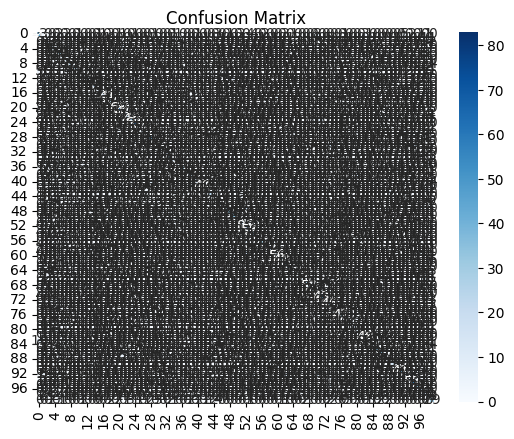

In [ ]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate testing accuracy, predicted label, confusion matrix, and table for classification report
from sklearn.metrics import *
cm=confusion_matrix(y_val_final, y_val_pred)
cr=classification_report(y_val_final, y_val_pred)
Prec=precision_score(y_val_final, y_val_pred, average='weighted')
fs=f1_score(y_val_final, y_val_pred, average='weighted')
rs=recall_score(y_val_final, y_val_pred, average='weighted')
accuracy=accuracy_score(y_val_final, y_val_pred)
print('Confusion matrix:')
print(cm)
print(cr)
print('Precision: %f' % fs)
print('F1 score: %f' % fs)
print('Recall: %f' % rs)
print('Model Accuracy: %f' % accuracy)

Confusion matrix:
[[46  3  0 ...  0  1  0]
 [ 1 40  2 ...  1  0  1]
 [ 0  0 13 ...  2  4  2]
 ...
 [ 0  2  4 ... 17  0  1]
 [ 1  2  2 ...  0 20  3]
 [ 0  0  0 ...  0  0 29]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       107
           1       0.25      0.37      0.30       107
           2       0.14      0.15      0.14        88
           3       0.12      0.15      0.13       103
           4       0.08      0.14      0.10        93
           5       0.19      0.28      0.23       105
           6       0.14      0.14      0.14        93
           7       0.11      0.19      0.14        96
           8       0.28      0.29      0.29        87
           9       0.40      0.28      0.33        88
          10       0.19      0.10      0.13       100
          11       0.25      0.12      0.16       100
          12       0.27      0.18      0.22        99
          13       0.16      0.19      0.17        86
          14   

In [ ]:
# Save classificationreport into csv
import pandas as pd
report = classification_report(y_val_final, y_val_pred, output_dict = True)
df=pd.DataFrame(report).transpose()
df.to_csv('classificationreport.csv',index=False)

In [ ]:
# Plot classification report and save to pdf function
def plot_classification(precision, recall, f1_score):
    plt.rcParams['font.size'] = 12
    plt.rc('axes', linewidth=1.75)
    marker_size = 8
    figsize = 6
    plt.figure(figsize=(1.4 * figsize, figsize))
    plt.subplot(3, 1, 1)
    plt.plot(precision, 'o', markersize=marker_size)
    # plt.legend(loc=0)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.title('PCA SVM Classification Precision')
    plt.ylabel('Precision', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 2)
    plt.plot(recall, 'o', markersize=marker_size)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.title('PCA SVM Classification Recall')
    plt.ylabel('Recall', fontsize=14)
    plt.xticks([])
    plt.subplot(3, 1, 3)
    plt.plot(f1_score, 'o', markersize=marker_size)
    # plt.yticks(np.arange(0.5, 1.01, 0.1))
    plt.title('PCA SVM Classification F1 Score')
    plt.ylabel('F1-score', fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.subplots_adjust(hspace=0.001)
    plt.tight_layout()
    plt.savefig("classification.pdf")


In [ ]:
# Plot classification report and save to pdf
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()
    plt.title('PCA SVM Confusion Matrix')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.savefig("confusion_matrix.pdf")
    plt.show()

[0.42990654 0.37383178 0.14772727 0.14563107 0.13978495 0.27619048
 0.13978495 0.1875     0.28735632 0.28409091 0.1        0.12
 0.18181818 0.18604651 0.21       0.10344828 0.18103448 0.45054945
 0.21238938 0.11538462 0.63551402 0.3539823  0.22429907 0.46464646
 0.63461538 0.04716981 0.09615385 0.07619048 0.40217391 0.18181818
 0.32110092 0.14583333 0.14893617 0.29807692 0.17073171 0.09183673
 0.28971963 0.14       0.21100917 0.18446602 0.1875     0.38461538
 0.11428571 0.20909091 0.05747126 0.12264151 0.11111111 0.23300971
 0.34693878 0.31730769 0.00952381 0.20588235 0.75454545 0.61052632
 0.40449438 0.0212766  0.27619048 0.28037383 0.24175824 0.16981132
 0.60869565 0.42105263 0.34615385 0.31067961 0.05769231 0.06060606
 0.05825243 0.26732673 0.53763441 0.27659574 0.21100917 0.45263158
 0.05208333 0.43809524 0.21052632 0.2970297  0.40384615 0.06796117
 0.08988764 0.13402062 0.125      0.10465116 0.49484536 0.13636364
 0.08988764 0.31192661 0.34653465 0.22222222 0.12790698 0.14851485
 

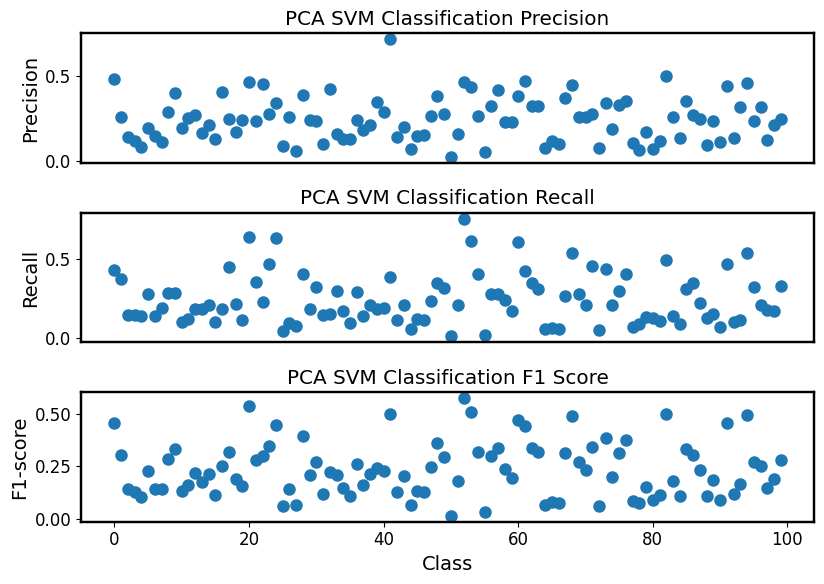

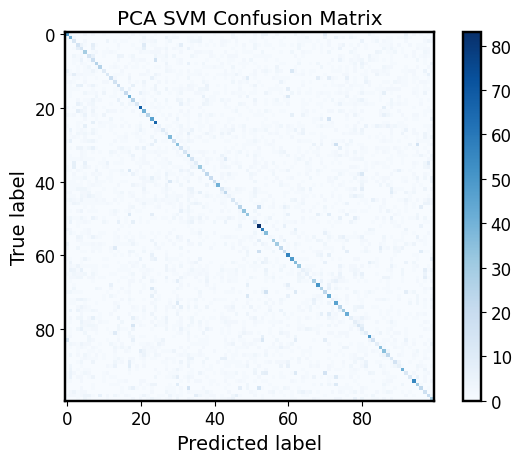

In [ ]:
# Plot and save confusion matrix
precision, recall, f1,_= precision_recall_fscore_support(y_val_final, y_val_pred)
print(recall)
plot_classification(precision, recall, f1)

# Plot confusion matrix
plot_confusion_matrix(cm)